In [1]:
import numpy as np
import pandas as pd

Data loading

In [2]:
url="https://raw.githubusercontent.com/dineshpiyasamara/LaptopPricePredictor/master/model%20building/laptop_price.csv"
data=pd.read_csv(url,encoding='latin_1')
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# for key,value in data.iteritems():
#     print(key,value)

In [4]:
data.shape

(1303, 12)

In [5]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [8]:
data['Ram']=data['Ram'].str.replace('GB','').astype('int64')
data['Weight']=data['Weight'].str.replace('kg','').astype('float')

In [9]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 122.3+ KB


In [11]:
# data.corr()['Price_euros']

In [12]:
def shorten(a):
    if a=='Samsung'or a=='Razer' or a=='Mediacom'or a=='Microsoft'or a=='Xiaomi'or a=='Vero'or a=='Chuwi'or a=='Google'or a=='Fujitsu' or a=='LG'or a=='Huawei':
        return'other'
    else:
        return a
data['Company']=data['Company'].apply(shorten)
    

In [13]:
len(data['Company'].value_counts())

9

In [14]:
data['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

In [15]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [16]:
# for i in data['Touchscreen']:
#     data[i].astype('str').apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [17]:
data.head(50)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,400.00,0,0
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,1158.70,0,0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.30,1495.00,0,0
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.60,770.00,0,1


In [18]:
len(data['Cpu'].value_counts())

118

In [19]:
data['cpu name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [20]:
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5


In [21]:
(data['cpu name'].value_counts())

cpu name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [22]:
def category(a):
    if a=='Intel Core i7'or a=='Intel Core i5'or a=='Intel Core i3':
        return a
    elif 'AMD' in a.split():
        return 'AmD'
    else:
        return 'other'
data['cpu name']=data['cpu name'].apply(category)

In [23]:
data['cpu name'].value_counts()

cpu name
Intel Core i7    527
Intel Core i5    423
other            155
Intel Core i3    136
AmD               62
Name: count, dtype: int64

In [24]:
data['gpu name']=data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [25]:
data['gpu name'].value_counts()

gpu name
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [26]:
data=data[data['gpu name']!='ARM']

In [27]:
data.shape

(1302, 16)

In [28]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [29]:
def ops(a):
    if a=='Windows 10' or a=='Windows 7' or a=='Windows 10 S':
        return 'windows'
    elif a=='macOS' or a=='Mac OS X':
        return 'mac'
    elif a=='Linux':
        return a
    else:
        return 'other'
data['OpSys']=data['OpSys'].apply(ops)
    

In [30]:
data['OpSys'].value_counts()

OpSys
windows    1125
other        94
Linux        62
mac          21
Name: count, dtype: int64

In [31]:
data=data.drop(columns=['laptop_ID','Inches','Product','ScreenResolution','Cpu','Gpu'])

In [32]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu name,gpu name
0,Apple,Ultrabook,8,mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,mac,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,other,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,mac,1.37,1803.60,0,1,Intel Core i5,Intel


In [33]:
data=pd.get_dummies(data)

In [34]:
data.head(3)

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_other,OpSys_windows,cpu name_AmD,cpu name_Intel Core i3,cpu name_Intel Core i5,cpu name_Intel Core i7,cpu name_other,gpu name_AMD,gpu name_Intel,gpu name_Nvidia
0,8,1.37,1339.69,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,8,1.34,898.94,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,8,1.86,575.00,0,0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False


relationship of each feature with price

In [35]:
data.corr()['Price_euros']

Ram                            0.742905
Weight                         0.209867
Price_euros                    1.000000
Touchscreen                    0.192917
IPS                            0.253320
Company_Acer                  -0.208541
Company_Apple                  0.080636
Company_Asus                  -0.010568
Company_Dell                   0.048245
Company_HP                    -0.041566
Company_Lenovo                -0.029293
Company_MSI                    0.180027
Company_Toshiba                0.040246
Company_other                  0.078537
TypeName_2 in 1 Convertible    0.074564
TypeName_Gaming                0.375659
TypeName_Netbook              -0.097660
TypeName_Notebook             -0.550182
TypeName_Ultrabook             0.255504
TypeName_Workstation           0.249719
OpSys_Linux                   -0.162204
OpSys_mac                      0.080636
OpSys_other                   -0.219517
OpSys_windows                  0.236918
cpu name_AmD                  -0.180259


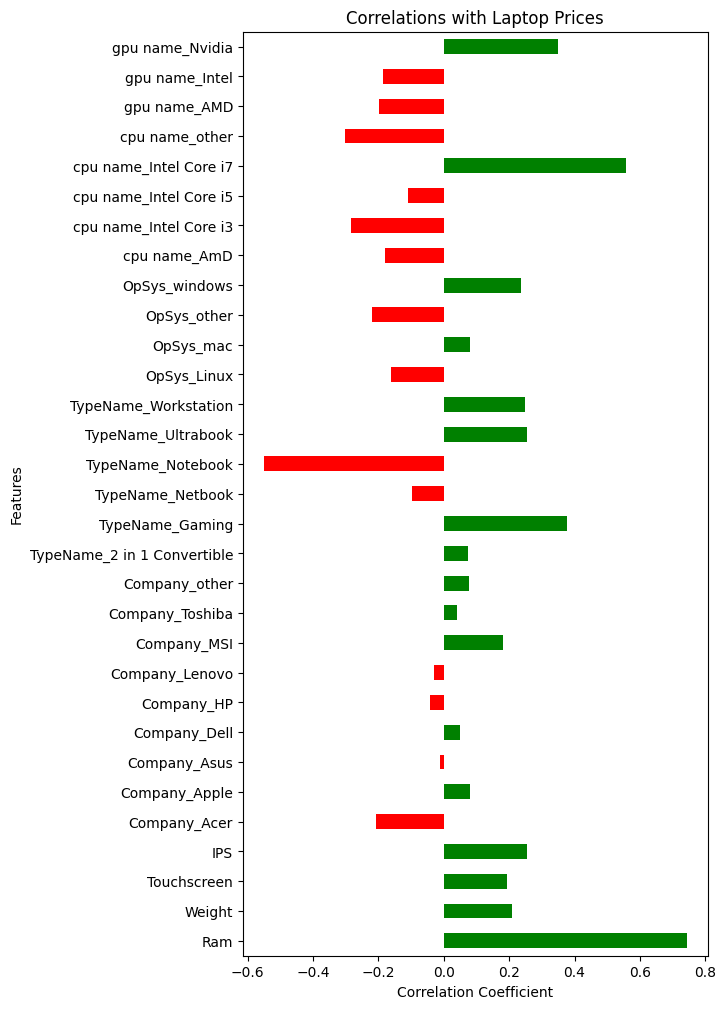

In [36]:
import matplotlib.pyplot as plt

# Extract the correlation values from the Series
correlations = data.corr()['Price_euros']

# Remove 'Price_euros' from the list (since we're plotting correlations with it)
correlations = correlations.drop('Price_euros')

# Define colors based on the sign of the correlation
colors = ['red' if c < 0 else 'green' for c in correlations]

# Create a bar chart with different colors for positive and negative correlations
plt.figure(figsize=(6, 12))  # Adjust the figure size to fit vertically
correlations.plot(kind='barh', color=colors)  # Use 'barh' for horizontal bars
plt.title("Correlations with Laptop Prices")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


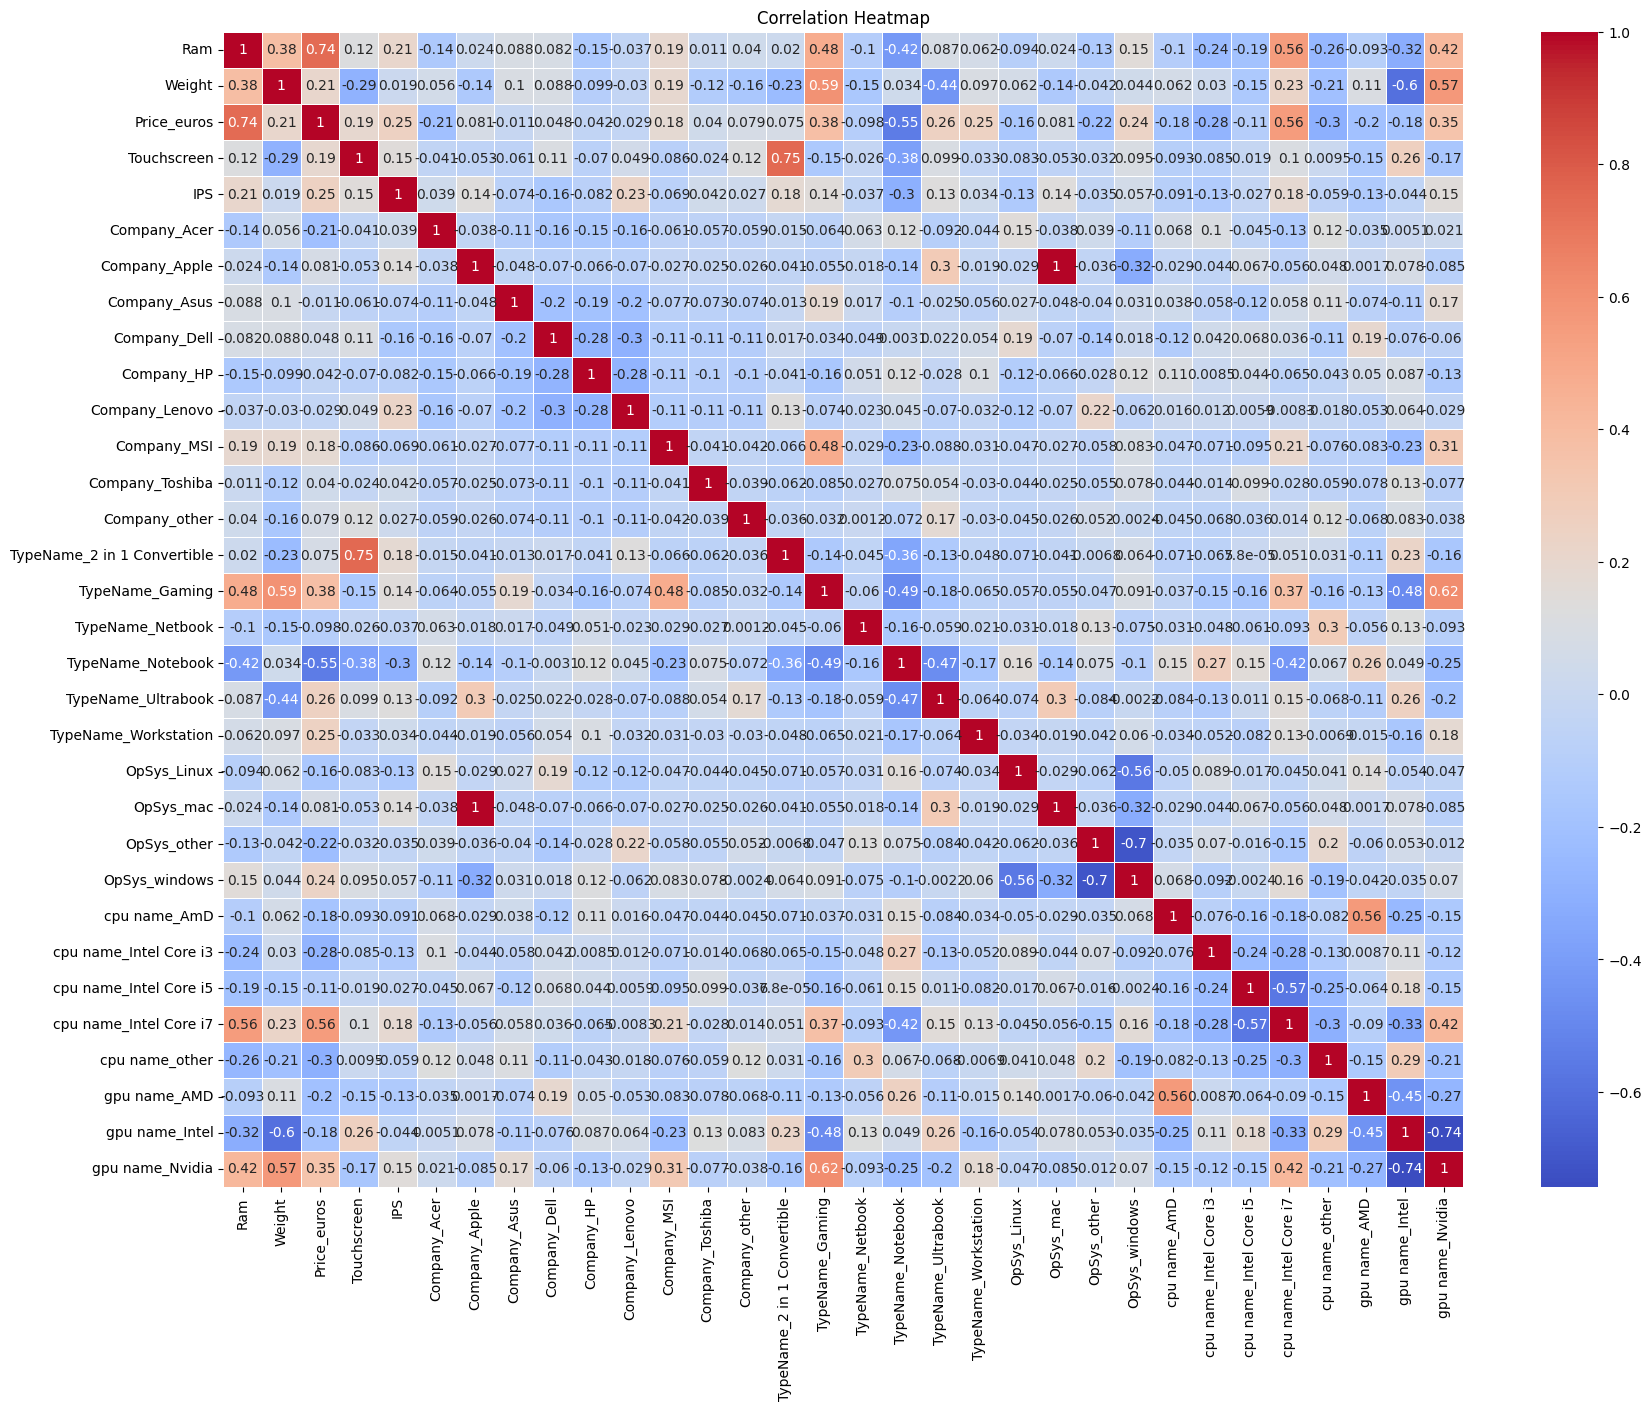

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [38]:
# print(data.shape)
data.shape

(1302, 32)

In [39]:
x=data.drop('Price_euros',axis=1)
y=data['Price_euros']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [41]:
print(x_train.shape,x_test.shape)

(1106, 31) (196, 31)


Training

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

# from sklearn.linear_model import lasso
# lsso=lasso()
# lsso.fit(x_train,y_train)

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [43]:
# print(lr.coef_)

In [44]:
acc_lr=lr.score(x_test,y_test)
# acc_ls=lsso.score(x_test,y_test)
acc_dt=dt.score(x_test,y_test)
acc_rf=rf.score(x_test,y_test)

In [45]:
print('linear regression :',acc_lr)
# print('lsso :',acc_ls)
print('decision tree :',acc_dt)
print('random forest :',acc_rf)

linear regression : 0.7222085370862132
decision tree : 0.7010715897034318
random forest : 0.7987633084364375


--------------------------------------------------------------------------------------------------------------------

random forest is selected

------------------------------------------------------------------------------------------------------------

Hyper parameter tunning -->

In [46]:
n_estimators=[100,1000] # 1,10,100
max_features=['sqrt'] #“sqrt”, “log2”, None
min_samples_leaf=[1,2,10] #2,5,10
criterion=['poisson','absolute_error'] #“squared_error”, “absolute_error”, “friedman_mse”, “poisson”


In [47]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'min_samples_leaf':min_samples_leaf,
            'criterion' :criterion
            }

In [48]:
from sklearn.model_selection import GridSearchCV
rf_random=GridSearchCV(estimator=rf,param_grid=random_grid)

In [49]:
rf_fit=rf_random.fit(x_train,y_train)

In [50]:
a=rf_fit.best_params_
print(a)

{'criterion': 'poisson', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}


In [51]:
a=rf_fit.best_estimator_
print(a)
# rf_random.best_estimator

RandomForestRegressor(criterion='poisson', max_features='sqrt')


In [52]:
best_model=rf_fit.best_estimator_
best_model.score(x_test,y_test)

0.8020556890009978

In [53]:
y_train_pred=rf.predict(x_train)
# y_train_pred.shape
y_test_pred=rf.predict(x_test)
# y_test_pred.shape

In [54]:
from sklearn.metrics import r2_score

In [55]:
a=r2_score(y_train,y_train_pred)
print('r2_train:',a)
b=r2_score(y_test,y_test_pred)
print('r2_test:',b)

r2_train: 0.9563717257138664
r2_test: 0.7987633084364375


Shap

Beeswarm plot

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


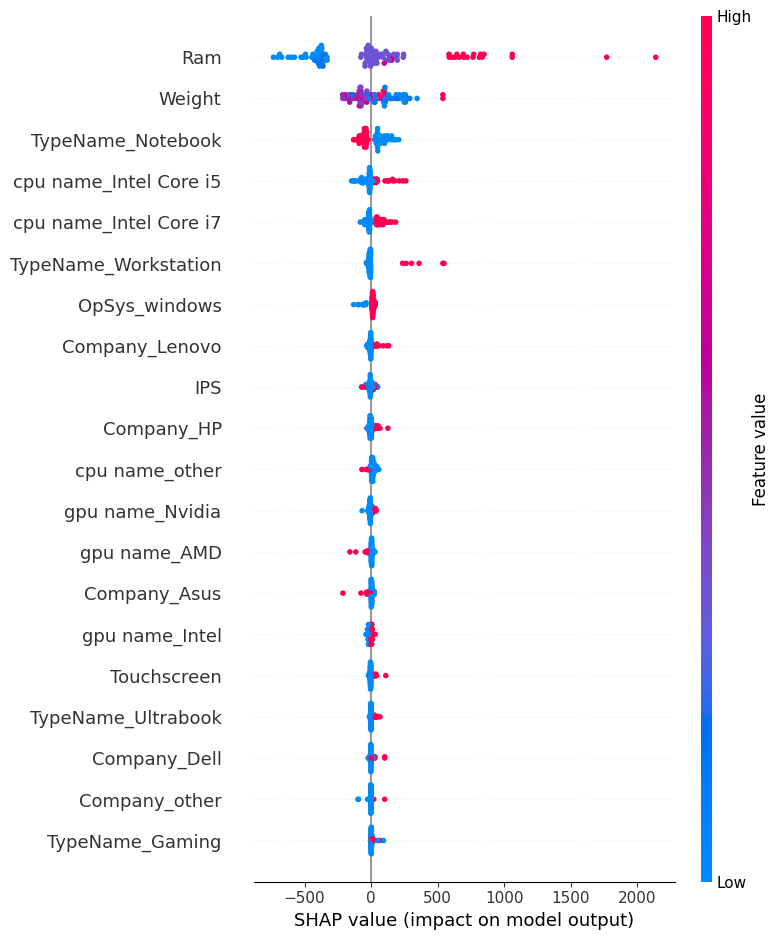

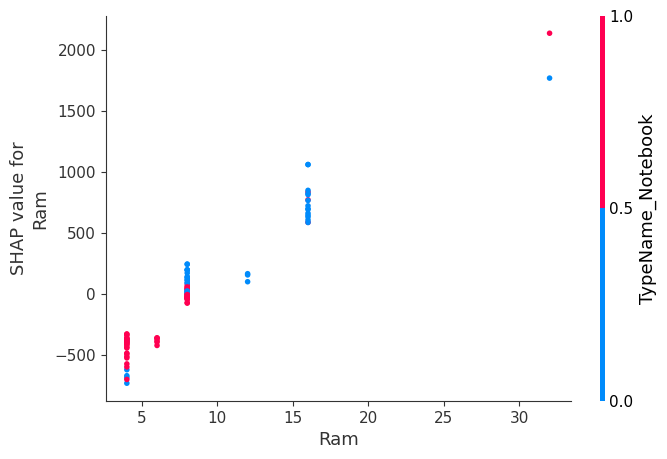

In [56]:
import shap
explainer = shap.Explainer(rf)
# Replace X_sample with your input data (features) for a specific observation
X_test_subset = x_test.iloc[:100]
# Compute SHAP values for the subset of data
shap_values = explainer.shap_values(X_test_subset)
# Visualize SHAP summary plot for the subset of data
shap.summary_plot(shap_values, X_test_subset)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_subset)
shap.dependence_plot("Ram", shap_values, X_test_subset)


waterfall

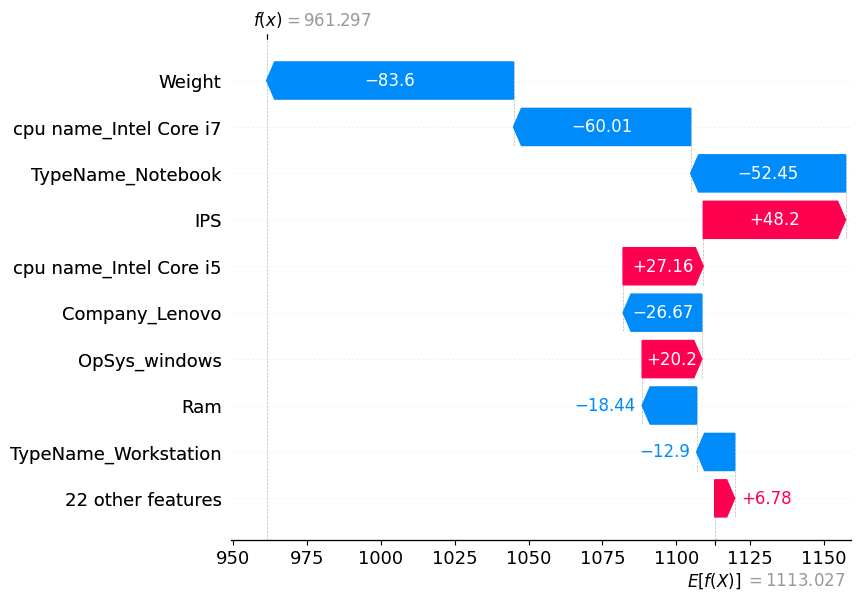

In [76]:
# Assuming you have an `Explanation` object created with your SHAP values
shap_values = explainer.shap_values(X_test_subset)  # Replace with your own SHAP values

# Define a list of feature names (replace with your actual feature names)
feature_names = X_test_subset.columns.tolist()

# Choose the 66th data point (change the index as needed)
data_point_index = 10
X_sample = X_test_subset.iloc[data_point_index]

# Create an Explanation object with feature names for the chosen data point
explanation = shap.Explanation(values=shap_values[data_point_index], base_values=explainer.expected_value[0], feature_names=feature_names)

# Create the waterfall plot for the 66th data point
shap.plots.waterfall(explanation)

absolute_mean_shap_values

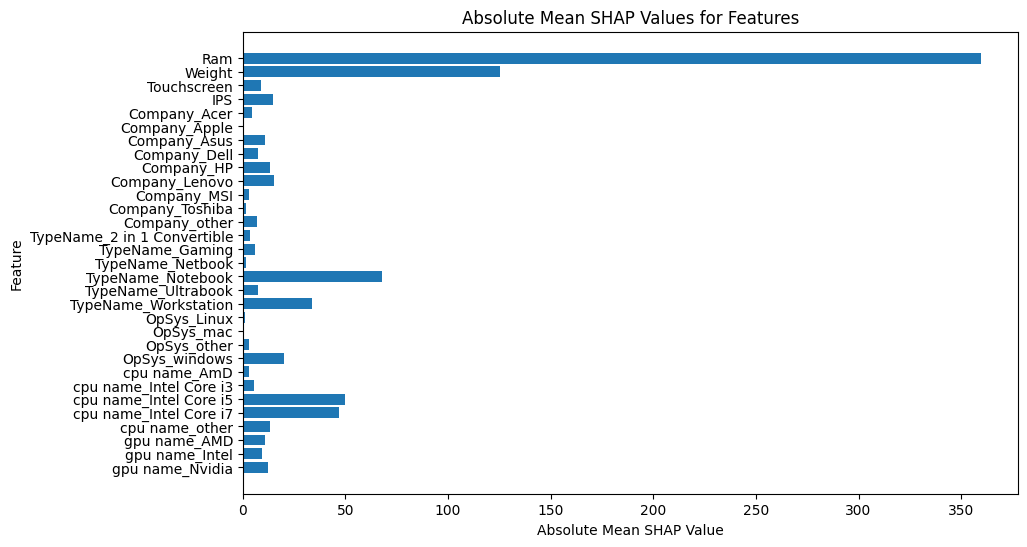

In [58]:
shap_values = explainer.shap_values(X_test_subset)  # Compute SHAP values for your test data
absolute_mean_shap_values = np.mean(np.abs(shap_values), axis=0)
# Assuming you have a list of feature names
feature_names = X_test_subset.columns.tolist()  # Replace with your actual feature names

plt.figure(figsize=(10, 6))
plt.barh(feature_names, absolute_mean_shap_values)
plt.xlabel('Absolute Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Absolute Mean SHAP Values for Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

Lime

Learning curve

In [59]:
import matplotlib.pyplot as pyplot
from sklearn.model_selection import learning_curve

In [60]:
train_sizes,train_scores,test_scores= learning_curve(rf,x_train,y_train,n_jobs=-1,train_sizes=np.linspace(0.01,1,50),verbose=1)

[learning_curve] Training set sizes: [  8  26  44  62  80  98 116 133 151 169 187 205 223 241 258 276 294 312
 330 348 366 383 401 419 437 455 473 491 508 526 544 562 580 598 616 633
 651 669 687 705 723 741 758 776 794 812 830 848 866 884]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   41.4s finished


In [61]:
train_mean=np.mean(train_scores,axis=1)
# train_mean

In [62]:
train_std=np.std(train_scores,axis=1)
# train_std

In [63]:
test_mean=np.mean(test_scores,axis=1)
# test_mean

In [64]:
test_std=np.std(test_scores,axis=1)
# test_std

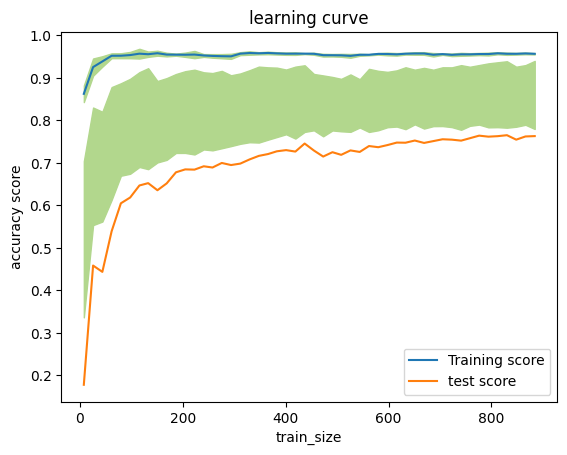

In [65]:
pyplot.plot(train_sizes,train_mean,label='Training score')
pyplot.plot(train_sizes,test_mean,label='test score')

pyplot.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#b2d78d')
pyplot.fill_between(train_sizes,train_mean-test_std,test_mean+test_std,color='#b2d78d')

pyplot.title('learning curve')
pyplot.xlabel('train_size')
pyplot.ylabel("accuracy score")
pyplot.legend(loc='best')


In [66]:
df_predict_train=pd.DataFrame({'actual price':y_train,'pred_train':y_train_pred})
df_predict_train['train_error']=df_predict_train['actual price']-df_predict_train['pred_train']

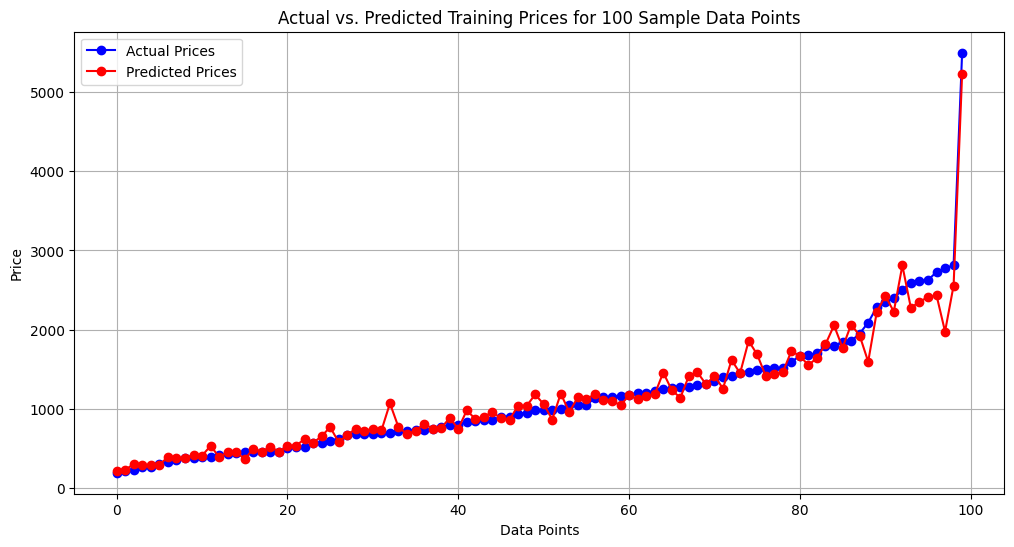

In [67]:
# import matplotlib.pyplot as plt
# import numpy as np

# Create an array of indices to represent data points
indices = np.arange(100)

# Sort the data points based on actual prices
sorted_indices = np.argsort(y_train[:100])

# Create a line plot for actual training values
plt.figure(figsize=(12, 6))
plt.plot(indices, np.array(y_train[:100])[sorted_indices], marker='o', linestyle='-', color='b', label='Actual Prices')
plt.plot(indices, np.array(y_train_pred[:100])[sorted_indices], marker='o', linestyle='-', color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Training Prices for 100 Sample Data Points')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
df_predict_test=pd.DataFrame({'actual price':y_test,'pred_test':y_test_pred})
df_predict_test['test_error']=df_predict_test['actual price']-df_predict_test['pred_test']

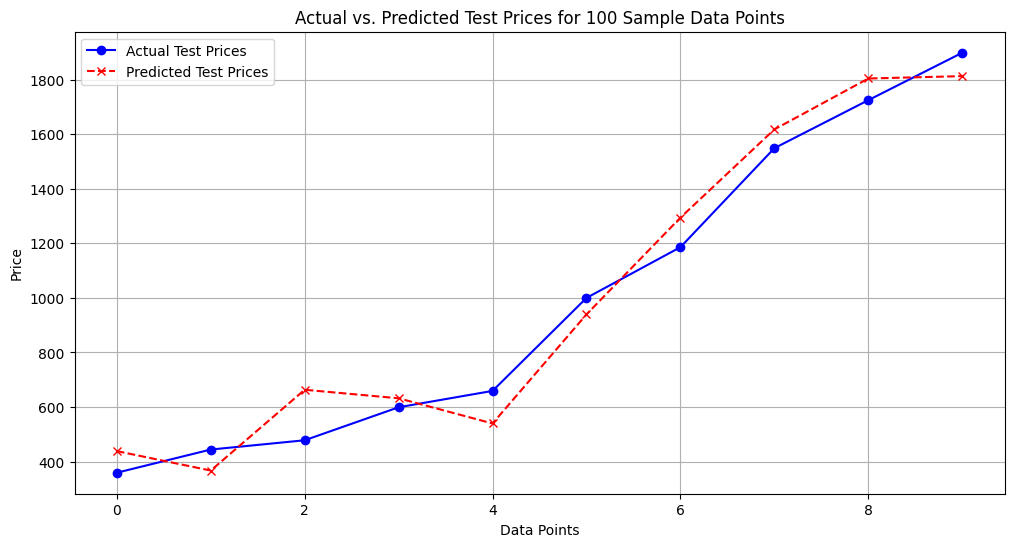

In [69]:

# Create an array of indices to represent data points
indices = np.arange(10)

# Sort the data points based on actual test prices
sorted_indices = np.argsort(y_test[:10])

# Create a line plot for actual test values
plt.figure(figsize=(12, 6))
plt.plot(indices, np.array(y_test[:100])[sorted_indices], marker='o', linestyle='-', color='b', label='Actual Test Prices')
plt.plot(indices, np.array(y_test_pred[:100])[sorted_indices], marker='x', linestyle='--', color='r', label='Predicted Test Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Test Prices for 100 Sample Data Points')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [71]:
mse_train=mean_squared_error(y_train,y_train_pred)
print('MSE_train:',mse_train)
mse_test=mean_squared_error(y_test,y_test_pred)
print('MSE_test:',mse_test)

MSE_train: 21312.683448790252
MSE_test: 97967.35623412


In [72]:
mae_train=mean_absolute_error(y_train,y_train_pred)
print('MAE_train:',mae_train)
mae_test=mean_absolute_error(y_test,y_test_pred)
print('MAE_test:',mae_test)

MAE_train: 93.69737462798477
MAE_test: 202.9682888141592
